<a href="https://colab.research.google.com/github/rickiepark/SM-Summer-ML/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

model = keras.models.load_model('best-cnn-model.h5')

--2024-07-10 11:42:03--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2024-07-10 11:42:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.05s   

2024-07-10 11:42:04 (71.1 MB/s) - ‘best-cnn-model.h5’ saved [4046712/4046712]



In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [3]:
model.layers

In [4]:
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [5]:
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(-0.02494116, 0.24951957)

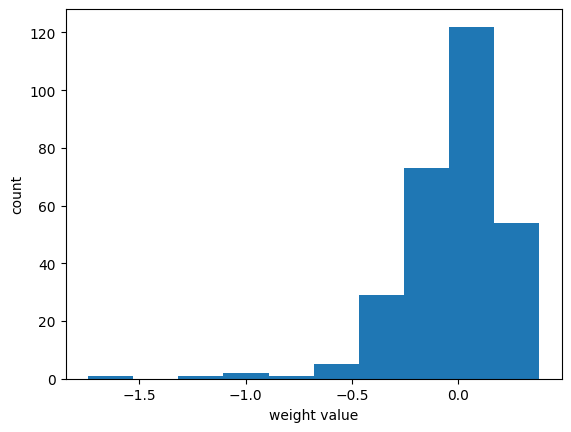

In [6]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight value')
plt.ylabel('count')
plt.show()

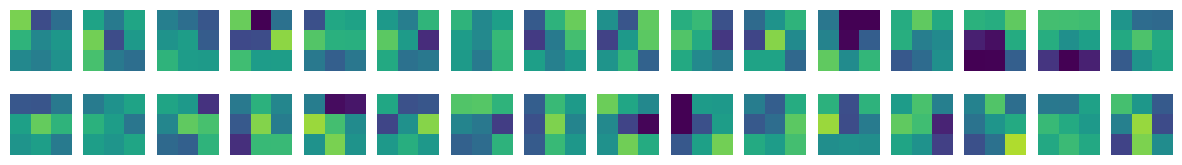

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

In [9]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()


(0.0041452143, 0.083407685)

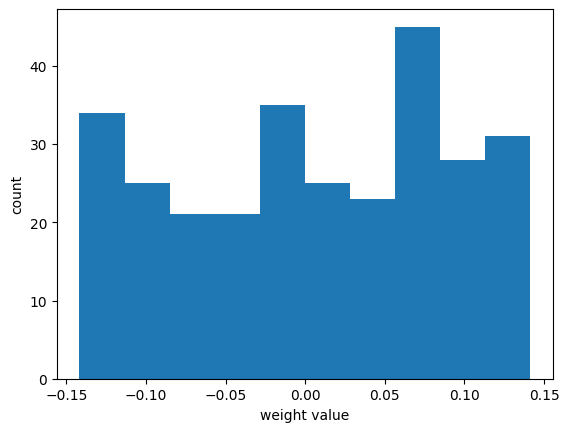

In [11]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight value')
plt.ylabel('count')
plt.show()

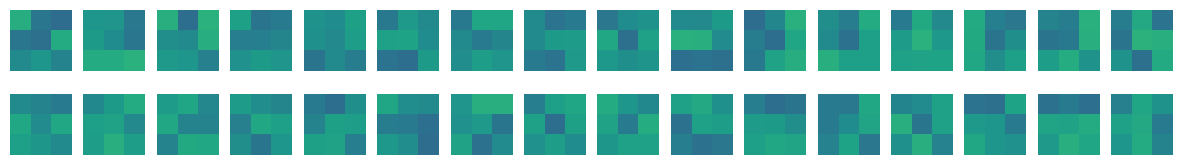

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [13]:
conv_acti = keras.Model(inputs=model.input, outputs=model.layers[0].output)

In [14]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [16]:
feature_maps.shape

(1, 28, 28, 32)

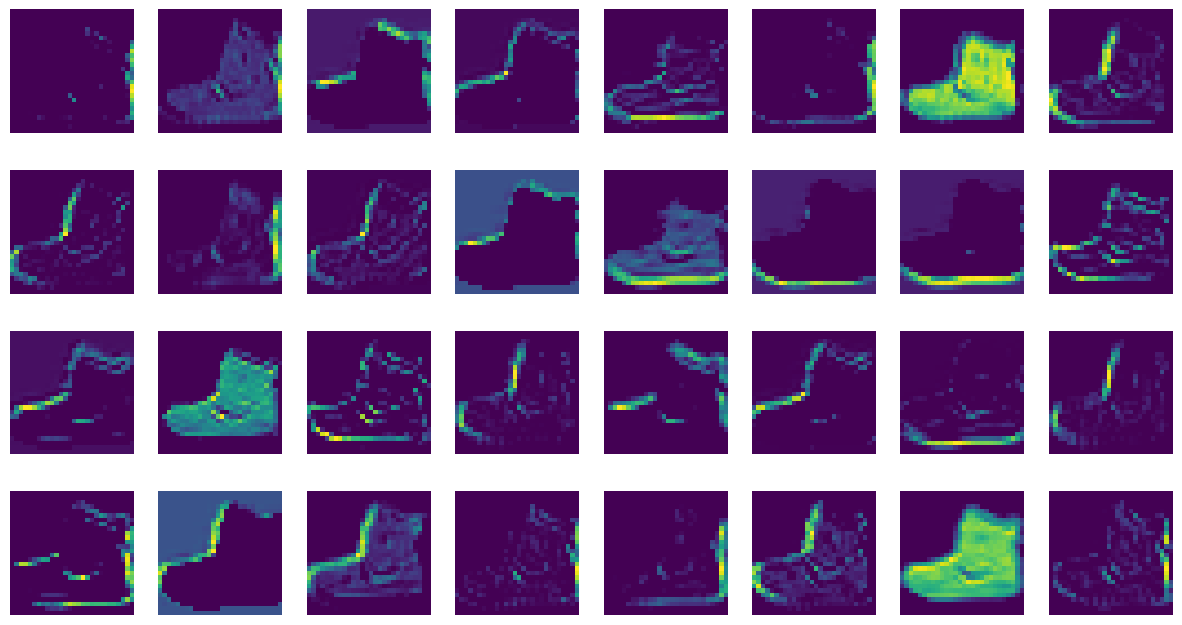

In [17]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [18]:
conv2_acti = keras.Model(inputs=model.input, outputs=model.layers[2].output)
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 1s 651ms/step


In [19]:
feature_maps.shape

(1, 14, 14, 64)

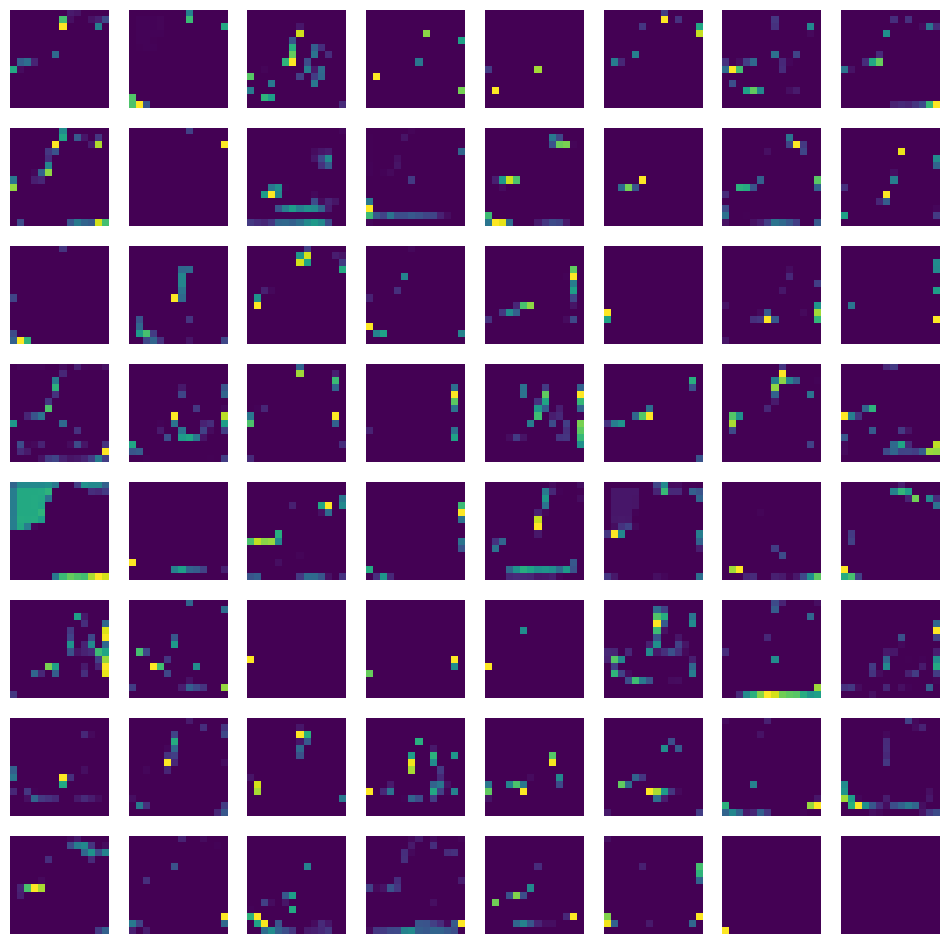

In [20]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()